# Basic demo for FASHN VTON v1.5

FASHN VTON v1.5: Efficient Maskless Virtual Try-On in Pixel Space

GitHub: https://github.com/fashn-AI/fashn-vton-1.5

## Installation

In [1]:
!git clone https://github.com/fashn-AI/fashn-vton-1.5
%cd fashn-vton-1.5

fatal: destination path 'fashn-vton-1.5' already exists and is not an empty directory.
/content/fashn-vton-1.5


In [2]:
!pip install -e .

Obtaining file:///content/fashn-vton-1.5
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for fashn-vton (pyproject.toml) ... done
  Created wheel for fashn-vton: filename=fashn_vton-1.5.0-0.editable-py3-none-any.whl size=5771 sha256=690018b8dfa894c2b0f26bf8ce49ac76fb1644da36a11586353c39ece8788a66
  Stored in directory: /tmp/pip-ephem-wheel-cache-e1f5f62s/wheels/83/85/d4/003a2789df48fea4fd69c5093b73b4495d75e045a364d41756
Successfully built fashn-vton
  Attempting uninstall: fashn-vton
    Found existing installation: fashn-vton 1.5.0
    Uninstalling fashn-vton-1.5.0:
      Successfully uninstalled fashn-vton-1.5.0


In [3]:
!python scripts/download_weights.py --weights-dir ./weights



  Saved to: /content/fashn-vton-1.5/weights/model.safetensors

  Saved to: /content/fashn-vton-1.5/weights/dwpose/yolox_l.onnx
  Saved to: /content/fashn-vton-1.5/weights/dwpose/dw-ll_ucoco_384.onnx

Loading weights: 100% 930/930 [00:01<00:00, 714.92it/s, Materializing param=segformer.encoder.patch_embeddings.3.proj.weight]
  Cached in HuggingFace hub cache

Download complete!

Weights directory structure:
    /content/fashn-vton-1.5/weights/
    ├── model.safetensors
    └── dwpose/
        ├── yolox_l.onnx
        └── dw-ll_ucoco_384.onnx

Usage:
    from fashn_vton import TryOnPipeline
    pipeline = TryOnPipeline(weights_dir="/content/fashn-vton-1.5/weights")



## Functionality test

In [8]:
from IPython.display import display
from PIL import Image
from fashn_vton import TryOnPipeline
import matplotlib.pyplot as plt

In [10]:
# Initialize pipeline (automatically uses GPU if available)
pipeline = TryOnPipeline(weights_dir="./weights")

# Load images
person = Image.open("examples/data/model.webp").convert("RGB")
garment = Image.open("examples/data/garment.webp").convert("RGB")

# Run inference
result = pipeline(
    person_image=person,
    garment_image=garment,
    category="tops",  # "tops" | "bottoms" | "one-pieces"
)

TryOnPipeline - INFO - Using device: cuda
TryOnPipeline - INFO - Using dtype: torch.bfloat16
TryOnPipeline - INFO - Loading TryOnModel from /content/fashn-vton-1.5/weights/model.safetensors
TryOnPipeline - INFO - TryOnModel loaded
TryOnPipeline - INFO - Loading DWPose from /content/fashn-vton-1.5/weights/dwpose
TryOnPipeline - INFO - DWPose loaded
TryOnPipeline - INFO - Loading FashnHumanParser


Loading weights:   0%|          | 0/930 [00:00<?, ?it/s]

TryOnPipeline - INFO - FashnHumanParser loaded
TryOnPipeline - INFO - Running inference with 30 timesteps...


Sampling:   0%|          | 0/30 [00:00<?, ?it/s]

TryOnPipeline - INFO - Generated 1 images


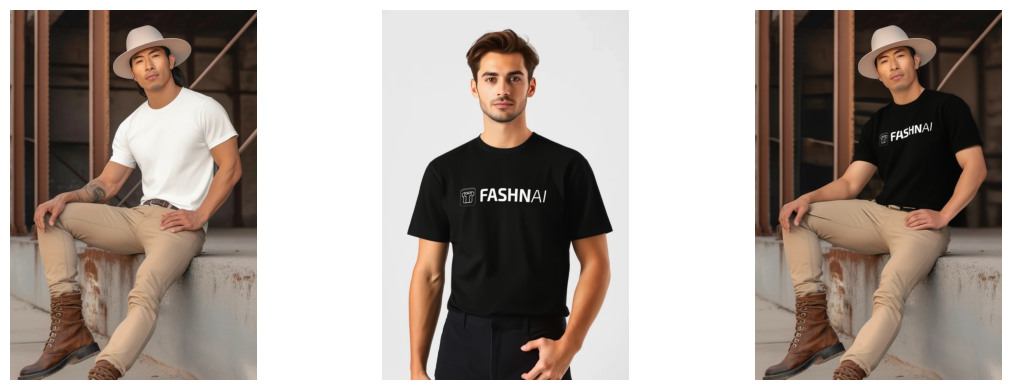

In [14]:
imgs = [person, garment, result.images[0]]
plt.figure(figsize=(12, 4))
for i, img in enumerate(imgs, 1):
    plt.subplot(1, 3, i)
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()
plt.show()

# Gradio Demo

In [17]:
import gradio as gr
from PIL import Image
import torch

def run_vton(person_img, garment_img, category):
    person_img = Image.fromarray(person_img)
    garment_img = Image.fromarray(garment_img)
    result = pipeline(
        person_image=person_img,
        garment_image=garment_img,
        category=category,
    )
    return result.images[0]

demo = gr.Interface(
    fn=run_vton,
    inputs=[
        gr.Image(type="numpy", label="Person"),
        gr.Image(type="numpy", label="Garment"),
        gr.Radio(
            choices=["tops", "bottoms", "one-pieces"],
            value="tops",
            label="Category",
        ),
    ],
    outputs=gr.Image(type="pil", label="Result"),
    title="Virtual Try-On Demo",
    description="Upload a person image and a garment image to generate a try-on result.",
)

demo.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://85c2878a2478c10b2e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
